### ERVSR: Efficient Reference-based Video Super-Resolution
This notebook provides the minimal steps to test the performance of ERVSR.
You can simply visualize the results and calculate PSNR on exemplary data.
All you need is to clone the repository, and run this notebook!

In [ ]:
!wget https://www.dropbox.com/s/gruth7l24ejsgkt/final.pth
!mv final.pth results/saved_models/

In [ ]:
!wget https://www.dropbox.com/s/cffujo2sjxiop0a/SPyNet.pytorch
!mv SPyNet.pytorch net/

In [ ]:
!pip3 install torch numpy pillow opencv-python matplotlib einops mmcv torchvision

In [1]:
import torch
from net.ERVSR import SRNet
from config import Config
from utils.minimum_utils import *

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})

In [3]:
DEVICE = 'cuda'
MODEL_PATH = 'results/saved_models/final.pth'

In [4]:
hr, lr, ref = get_tensor()

In [ ]:
# Print the size of the low-resolution video, reference image, and ground-truth video

print(lr.size())
print(ref.size())
print(hr.size())

torch.Size([7, 3, 270, 480])
torch.Size([1, 3, 270, 480])
torch.Size([7, 3, 1080, 1920])


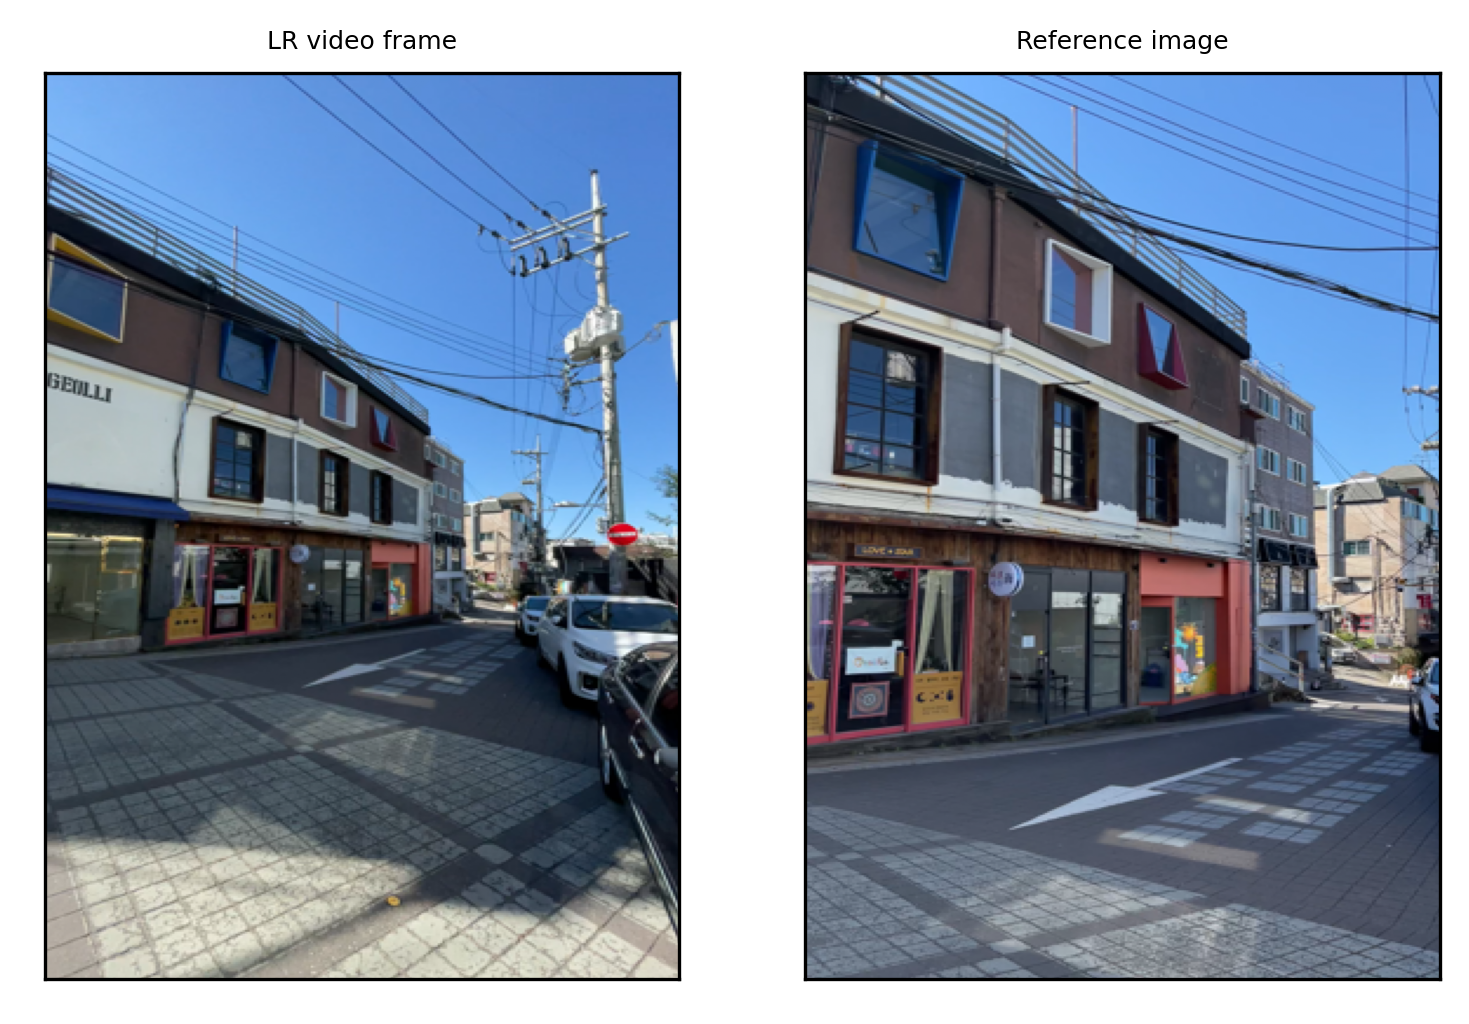

In [ ]:
# Viewpoints of reference image is different from LR video frames

INDEX = 0
visualize_viewpoint_by_index(INDEX, lr, ref)

In [ ]:
# Load model 

config = Config('', DEVICE)
config.spynet = None
model = SRNet(config).to(DEVICE)
model.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [ ]:
# Get output 

with torch.no_grad():
  out = model(lr.unsqueeze(0).to(DEVICE, dtype=torch.float), ref.unsqueeze(0).to(DEVICE, dtype=torch.float))

In [ ]:
if DEVICE != 'cpu':
  out = out.detach().cpu()
  lr = lr.detach().cpu()
  ref = ref.detach().cpu()

out_np = out.squeeze(0).numpy()
hr_np = hr.numpy()
lr_np = lr.squeeze(0).numpy()
ref_np = ref.squeeze(0).numpy()

In [ ]:
psnrs = []
for i in range(7):
  psnr_val = psnr(out_np[i], hr_np[i])
  psnrs.append(psnr_val)
  print("PSNR of frame {} is {:.2f}".format(i, psnr_val))

PSNR of frame 0 is 34.84
PSNR of frame 1 is 35.36
PSNR of frame 2 is 35.63
PSNR of frame 3 is 35.46
PSNR of frame 4 is 35.53
PSNR of frame 5 is 34.38
PSNR of frame 6 is 35.12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


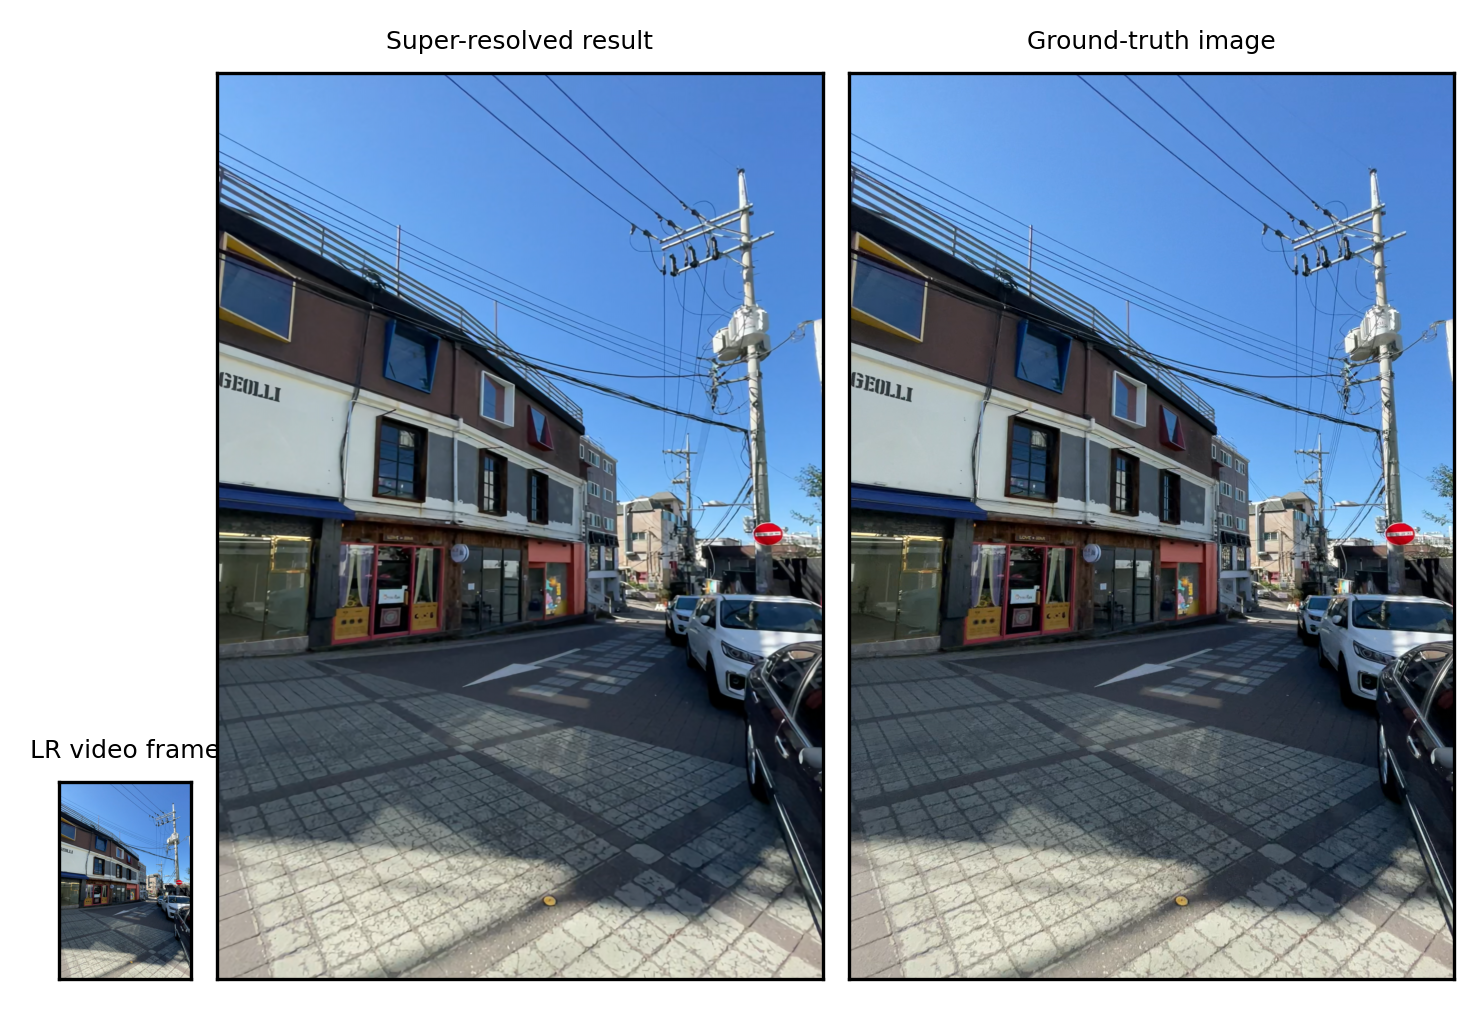

In [ ]:
# Visualize super-resolution result by video frame index

INDEX = 0
visualize_sr_by_index(INDEX, lr_np, out_np, hr_np)

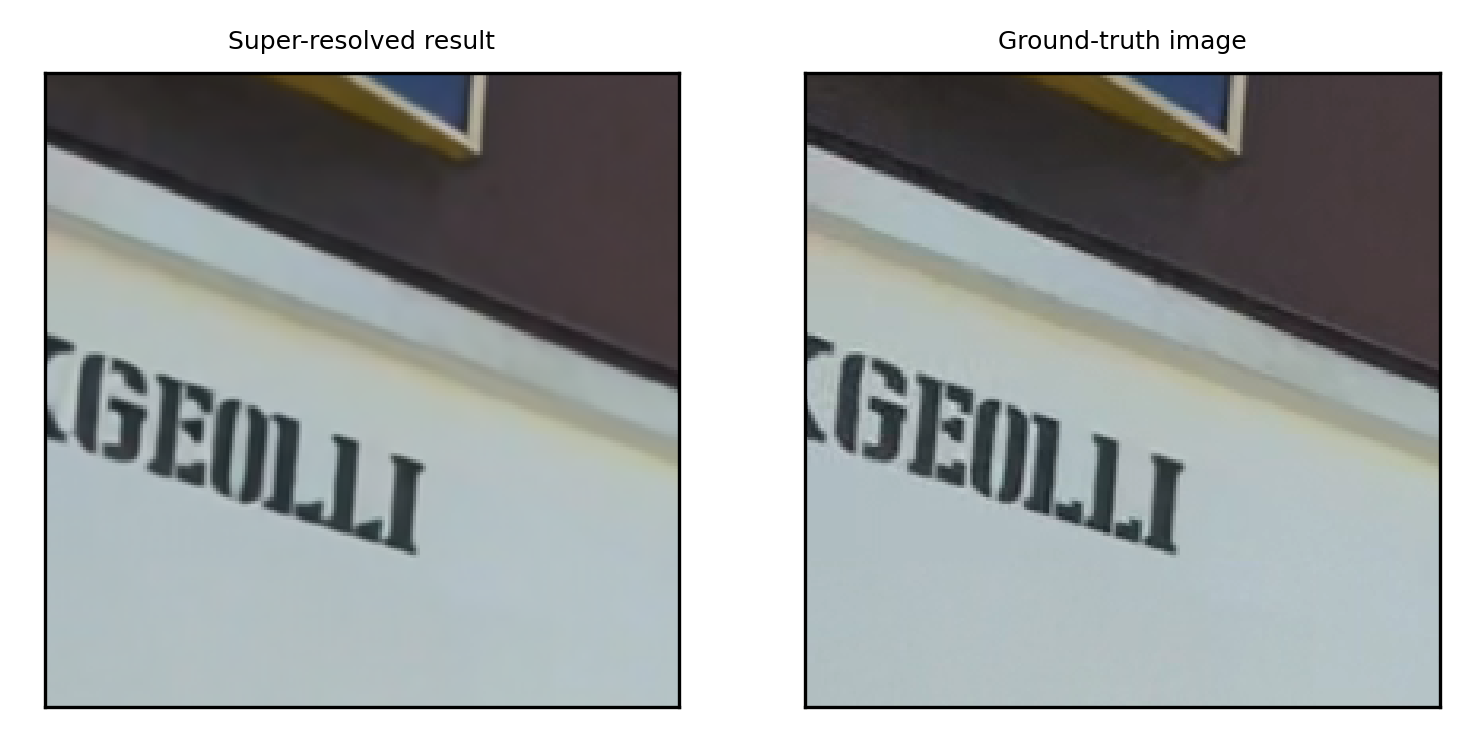

In [ ]:
# Visualize zoomed-in super-resolution result 

INDEX = 3
ZOOM = (550, 750, 0, 200)

visualize_zoom_by_index(INDEX, out_np, hr_np, ZOOM)